In [2]:
import numpy as np


In [3]:
import pandas as pd

In [4]:
np.random.seed(42)

In [5]:
apartments=[f"Apt_{i}" for i in range(1,21)]

In [6]:
dates=pd.date_range(start="2025-07-01",periods=30,freq="D")

In [7]:
data = {
    "Date": np.tile(dates,len(apartments)),
    "Apartment":np.repeat(apartments,len(dates)),
    "Electricity_usage":np.random.normal(loc=20,scale=5,size=len(dates)*len(apartments))
}


In [8]:
df = pd.DataFrame(data)

In [9]:
df["Electricity_usage"] = df["Electricity_usage"].round(2)

In [10]:
df

,Date,Apartment,Electricity_usage
0,2025-07-01,Apt_1,22.48
1,2025-07-02,Apt_1,19.31
2,2025-07-03,Apt_1,23.24
3,2025-07-04,Apt_1,27.62
4,2025-07-05,Apt_1,18.83
...,...,...,...
595,2025-07-26,Apt_20,17.45
596,2025-07-27,Apt_20,18.65
597,2025-07-28,Apt_20,15.11
598,2025-07-29,Apt_20,17.78


In [11]:
daily_avg=df.groupby("Date")["Electricity_usage"].mean()
print(daily_avg.head)

<bound method NDFrame.head of Date
2025-07-01    21.0440
2025-07-02    20.8695
2025-07-03    19.5685
2025-07-04    20.9855
2025-07-05    19.7835
2025-07-06    19.3785
2025-07-07    20.2185
2025-07-08    19.2570
2025-07-09    20.0280
2025-07-10    19.3780
2025-07-11    18.5835
2025-07-12    20.7340
2025-07-13    21.8065
2025-07-14    19.9035
2025-07-15    19.8960
2025-07-16    19.8690
2025-07-17    19.6250
2025-07-18    19.5135
2025-07-19    20.1775
2025-07-20    16.9090
2025-07-21    19.9490
2025-07-22    20.0735
2025-07-23    17.3065
2025-07-24    21.3015
2025-07-25    20.1795
2025-07-26    19.1140
2025-07-27    19.7270
2025-07-28    19.3930
2025-07-29    21.3020
2025-07-30    22.1005
Name: Electricity_usage, dtype: float64>


In [12]:
print(df.dtypes)

Date                 datetime64[ns]
Apartment                    object
Electricity_usage           float64
dtype: object


In [13]:
usage_per_apartment = df.groupby("Apartment")["Electricity_usage"].sum().sort_values(ascending=False)

In [14]:
print(usage_per_apartment)

Apartment
Apt_11    642.31
Apt_6     641.82
Apt_13    634.22
Apt_10    616.09
Apt_20    613.14
Apt_7     609.87
Apt_8     607.18
Apt_16    606.97
Apt_14    604.33
Apt_3     601.93
Apt_4     596.99
Apt_15    591.38
Apt_19    586.61
Apt_5     585.76
Apt_2     581.81
Apt_9     578.48
Apt_1     571.80
Apt_17    570.33
Apt_12    568.99
Apt_18    549.49
Name: Electricity_usage, dtype: float64


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns


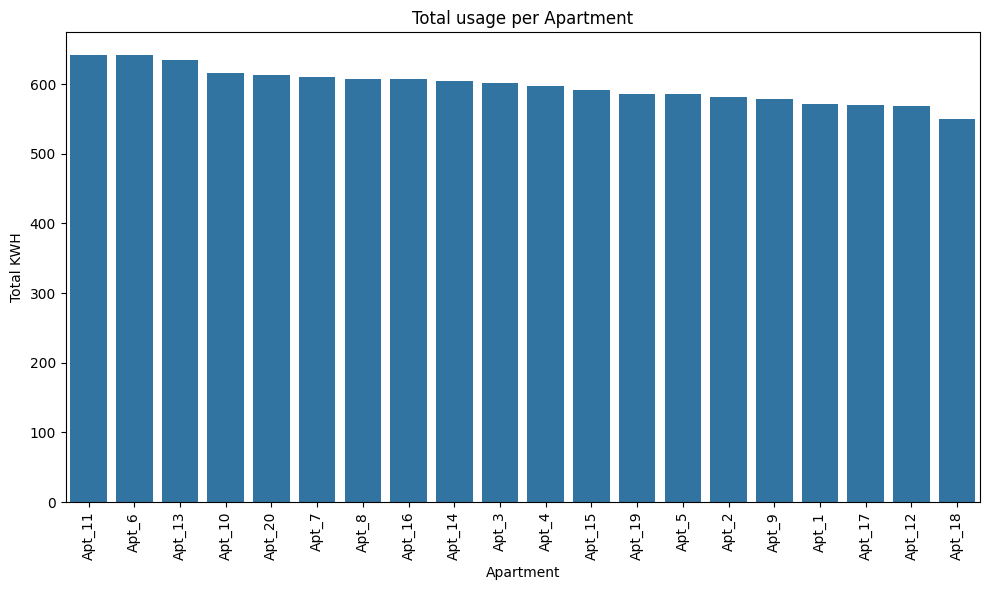

In [19]:
plt.figure(figsize=(10,6))
sns.barplot(x=usage_per_apartment.index, y=usage_per_apartment.values)
plt.xticks(rotation=90)
plt.title("Total usage per Apartment")
plt.xlabel("Apartment")
plt.ylabel("Total KWH")
plt.tight_layout()
plt.show()

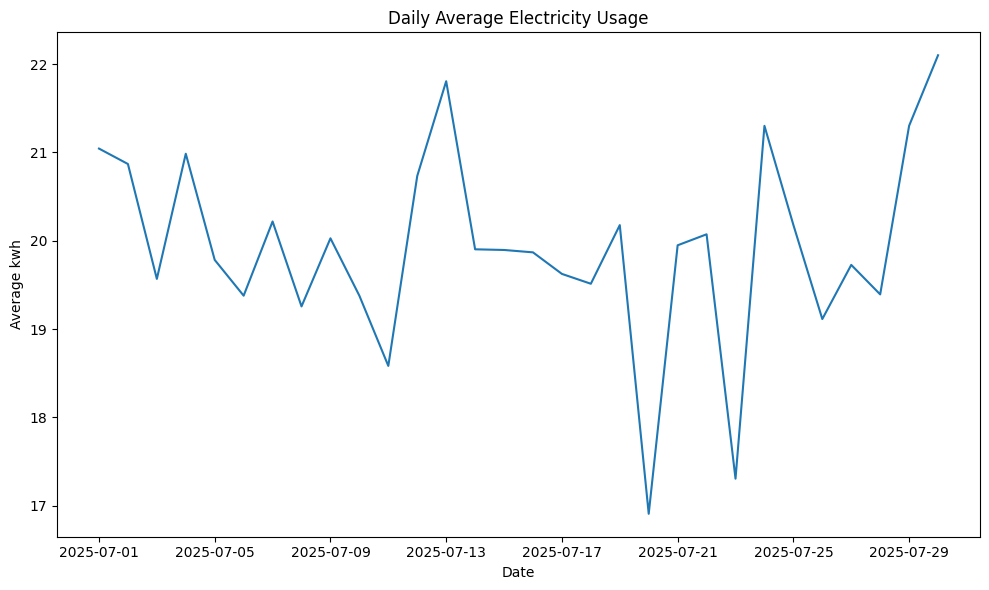

In [20]:
plt.figure(figsize=(10,6))
sns.lineplot(x=daily_avg.index, y=daily_avg.values)
plt.title("Daily Average Electricity Usage")
plt.xlabel("Date")
plt.ylabel("Average kwh")
plt.tight_layout()
plt.show()

In [24]:
threshold = df["Electricity_usage"].mean() + 2 * df["Electricity_usage"].std()
df["High_Usage_flag"] = df["Electricity_usage"] > threshold
print(df[df["High_Usage_flag"] == True].head())

          Date Apartment  Electricity_usage  High_Usage_flag
113 2025-07-24     Apt_4              32.32             True
125 2025-07-06     Apt_5              30.95             True
179 2025-07-30     Apt_6              33.60             True
209 2025-07-30     Apt_7              39.26             True
220 2025-07-11     Apt_8              31.57             True
